In [1]:
# Install necessary libraries if not already installed
!pip install numpy networkx matplotlib pandas seaborn

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

# Set random seed for reproducibility
np.random.seed(42)

# Model Parameters
n = 100  # Number of nodes (players)
m = 3    # Number of edges per new node (preferential attachment)
theta = 2  # Cost function exponent
beta = 2   # Public good multiplier
epsilon = 1e-5  # Convergence threshold
max_iter = 1000  # Maximum iterations for Nash equilibrium

# Generate Albert-Barabási network
network = nx.barabasi_albert_graph(n, m, seed=42)
adj_matrix = nx.to_numpy_array(network)

# Compute degrees (connectivity levels)
degrees = np.array([network.degree(i) for i in range(n)])
safe_degrees = np.where(degrees > 0, degrees, 1)  # Ensures no division by zero

# Assign altruism values using a Beta distribution
alpha = np.random.beta(a=2, b=2, size=n)
alpha = np.clip(alpha, 0, 1)  # Ensuring values remain within [0,1]

# Initialize Nash equilibrium contributions
c_fp = np.zeros(n)
c_new = np.zeros_like(c_fp)

# Iterative Best Response Nash Equilibrium Calculation
for iteration in range(max_iter):
    for i in range(n):
        neighbor_contributions = adj_matrix[i, :] @ c_fp  # Sum of neighbors' contributions
        if degrees[i] > 0:
            c_new[i] = ((beta / (theta * safe_degrees[i])) * (1 + alpha[i] * neighbor_contributions)) ** (1 / (theta - 1))
        else:
            c_new[i] = 0  # No contribution for isolated nodes

    # Check for convergence
    if np.mean(np.abs(c_new - c_fp)) < epsilon:
        break
    c_fp = c_new.copy()

# Store results in a DataFrame
results_df = pd.DataFrame({
    "Player": np.arange(n),
    "Degree": degrees,
    "Alpha": alpha,
    "Optimal Contribution": c_fp
})


           Player      Degree       Alpha  Optimal Contribution
count  100.000000  100.000000  100.000000            100.000000
mean    49.500000    5.820000    0.507688              0.415926
std     29.011492    5.532968    0.213586              0.117632
min      0.000000    3.000000    0.115934              0.125886
25%     24.750000    3.000000    0.351018              0.323008
50%     49.500000    4.000000    0.505387              0.437404
75%     74.250000    5.000000    0.680301              0.512596
max     99.000000   30.000000    0.919657              0.611029


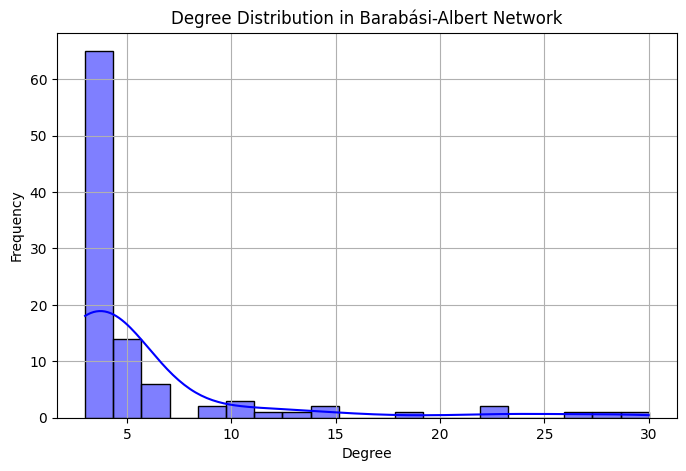

In [3]:
# Print summary statistics
print(results_df.describe())

# Plot degree distribution to check scale-free property
plt.figure(figsize=(8, 5))
sns.histplot(degrees, bins=20, kde=True, color="blue", edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution in Barabási-Albert Network")
plt.grid(True)
plt.show()

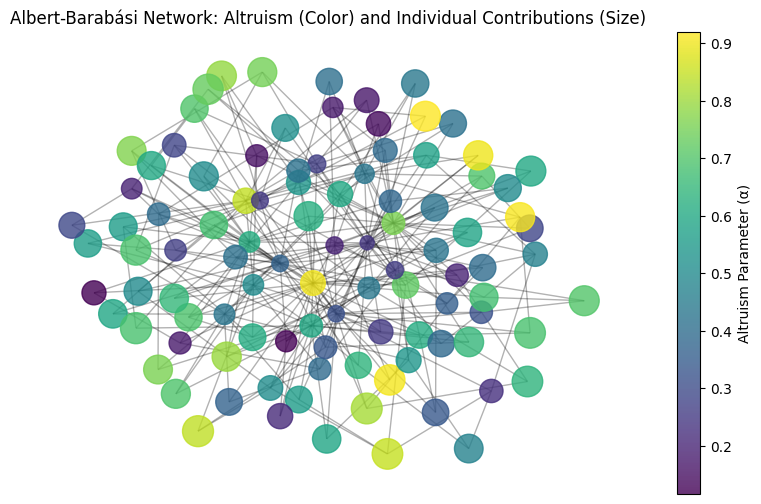

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Visualization: Albert-Barabási Network with Altruism & Contributions
plt.figure(figsize=(10, 6))

# Compute node positions (Kamada-Kawai for better visualization)
pos = nx.kamada_kawai_layout(network)

# Draw network edges first (for clarity)
nx.draw_networkx_edges(network, pos, alpha=0.3)

# Normalize node sizes for better visibility
node_sizes = 500 * (c_fp / c_fp.max())  # Scale contributions for visualization
node_colors = alpha  # Node colors based on altruism parameter

# Scatter plot for nodes
sc = plt.scatter(
    [pos[i][0] for i in range(n)],
    [pos[i][1] for i in range(n)],
    c=node_colors, s=node_sizes, cmap="viridis", alpha=0.8
)

# Add colorbar for altruism levels
cbar = plt.colorbar(sc)
cbar.set_label("Altruism Parameter (α)")

# Title and display settings
plt.title("Albert-Barabási Network: Altruism (Color) and Individual Contributions (Size)")
plt.axis("off")  # Hide axes for better visualization

# Save figure with high resolution
plt.savefig("albert_barabasi_network.png", dpi=300, bbox_inches="tight")
plt.show()

# Download file (if running in Colab)
files.download("albert_barabasi_network.png")


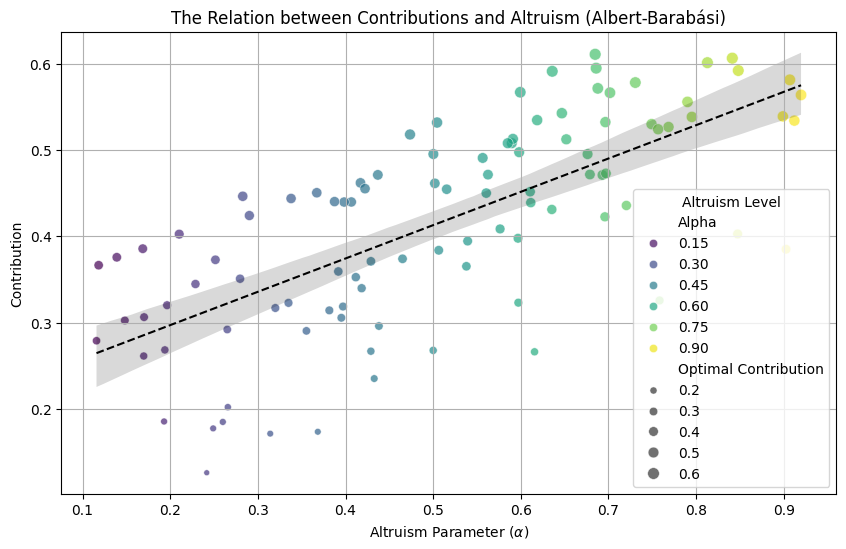

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Scatter Plot: Altruism Parameter vs. Individual Contribution
plt.figure(figsize=(10, 6))

# Create scatter plot with color based on altruism levels
sns.scatterplot(
    data=results_df, x="Alpha", y="Optimal Contribution",
    hue="Alpha", size="Optimal Contribution",
    palette="viridis", alpha=0.7
)

# Add regression line to show trend
sns.regplot(
    data=results_df, x="Alpha", y="Optimal Contribution",
    scatter=False, color="black", line_kws={"linewidth": 1.5, "linestyle": "dashed"}
)

# Labels and title
plt.xlabel("Altruism Parameter ($\\alpha$)")
plt.ylabel("Contribution")
plt.title("The Relation between Contributions and Altruism (Albert-Barabási)")

# Improve legend placement
plt.legend(title="Altruism Level")

# Grid for better readability
plt.grid(True)

# Save figure with high resolution
plt.savefig("contributions_vs_altruism_AB.png", dpi=300, bbox_inches="tight")
plt.show()

# Download file (if running in Colab)
files.download("contributions_vs_altruism_AB.png")


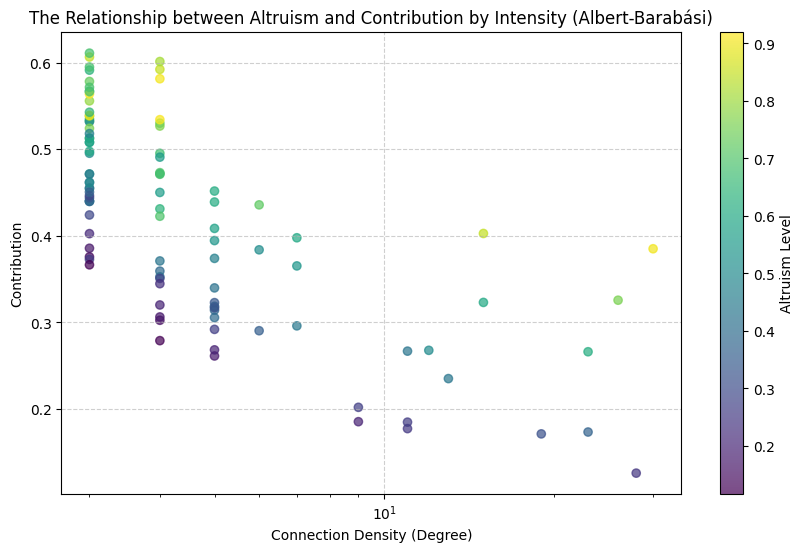

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Scatter Plot: Connection Density vs. Individual Contribution by Altruism Level
plt.figure(figsize=(10, 6))

# Create scatter plot
sc = plt.scatter(
    results_df["Degree"], results_df["Optimal Contribution"],
    c=results_df["Alpha"], cmap="viridis", alpha=0.7
)

# Add colorbar for altruism levels
cbar = plt.colorbar(sc)
cbar.set_label("Altruism Level")

# Set labels and title
plt.xlabel("Connection Density (Degree)")
plt.ylabel("Contribution")
plt.title("The Relationship between Altruism and Contribution by Intensity (Albert-Barabási)")

# Use log scale for better visualization
plt.xscale("log")

# Display grid
plt.grid(True, linestyle="--", alpha=0.6)

# Save figure with high resolution
plt.savefig("altruism_vs_contribution_by_density_AB.png", dpi=300, bbox_inches="tight")
plt.show()

# Download file (if running in Colab)
files.download("altruism_vs_contribution_by_density_AB.png")


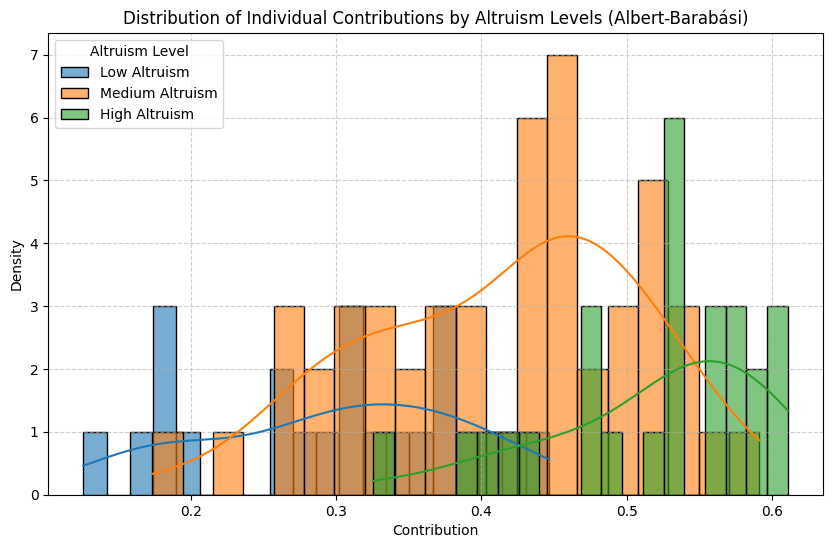

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Define altruism categories
altruism_categories = {
    "Low Altruism": (0.0, 0.33),
    "Medium Altruism": (0.33, 0.66),
    "High Altruism": (0.66, 1.0)
}

# Define colors for consistency
colors = {"Low Altruism": "#1f77b4", "Medium Altruism": "#ff7f0e", "High Altruism": "#2ca02c"}

# Create the figure
plt.figure(figsize=(10, 6))

# Loop through each altruism category and plot the histogram
for category, (alpha_min, alpha_max) in altruism_categories.items():
    # Filter data based on altruism level
    mask = (results_df["Alpha"] >= alpha_min) & (results_df["Alpha"] < alpha_max)
    filtered_contributions = results_df[mask]["Optimal Contribution"]

    # Plot histogram
    sns.histplot(filtered_contributions, bins=20, kde=True, label=category, color=colors[category], alpha=0.6, edgecolor="black")

# Labels and title
plt.xlabel("Contribution")
plt.ylabel("Density")
plt.title("Distribution of Individual Contributions by Altruism Levels (Albert-Barabási)")

# Add legend
plt.legend(title="Altruism Level")

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Save figure
filename = "contribution_distribution_by_altruism_AB.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

# Download file (if running in Colab)
files.download(filename)


<ipython-input-8-8b5652cd5f48>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Delta_C"] = c_social_optimal - filtered_df["Optimal Contribution"]
<ipython-input-8-8b5652cd5f48>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Delta_C"] = c_social_optimal - filtered_df["Optimal Contribution"]
<ipython-input-8-8b5652cd5f48>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

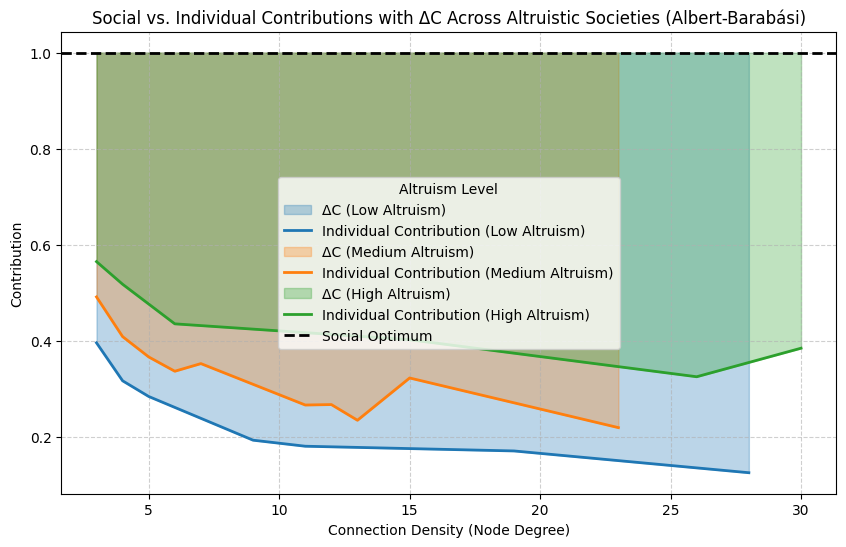

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Compute Social Optimum
c_social_optimal = (beta / theta) ** (1 / (theta - 1))

# Dictionary to store individual and social contributions
individual_contributions_per_degree = {}
delta_c_per_degree = {}

# Define altruism categories
altruism_categories = {
    "Low Altruism": (0.0, 0.33),
    "Medium Altruism": (0.33, 0.66),
    "High Altruism": (0.66, 1.0)
}

# Loop through each altruism category and compute values
for category, (alpha_min, alpha_max) in altruism_categories.items():
    # Filter by altruism level
    mask = (results_df["Alpha"] >= alpha_min) & (results_df["Alpha"] < alpha_max)
    filtered_df = results_df[mask]

    # Compute ΔC = Social Optimum - Individual Optimal
    filtered_df["Delta_C"] = c_social_optimal - filtered_df["Optimal Contribution"]

    # Compute mean values per degree
    contribution_stats = filtered_df.groupby("Degree")["Optimal Contribution"].mean()
    delta_c_stats = filtered_df.groupby("Degree")["Delta_C"].mean()

    # Store values
    individual_contributions_per_degree[category] = contribution_stats
    delta_c_per_degree[category] = delta_c_stats

# **Plot Individual Contributions with ΔC as a shaded area**
plt.figure(figsize=(10, 6))

# **Use the same color palette for consistency**
colors = {"Low Altruism": "#1f77b4", "Medium Altruism": "#ff7f0e", "High Altruism": "#2ca02c"}

# Plot individual contributions and shaded ΔC area
for category in altruism_categories.keys():
    contribution_values = individual_contributions_per_degree[category]
    delta_c_values = delta_c_per_degree[category]

    # Plot shaded area (ΔC)
    plt.fill_between(contribution_values.index, contribution_values, c_social_optimal,
                     color=colors[category], alpha=0.3, label=f"ΔC ({category})")

    # Plot individual contribution line
    plt.plot(contribution_values.index, contribution_values, color=colors[category],
             linestyle="solid", linewidth=2, label=f"Individual Contribution ({category})")

# Plot social optimum as a dashed line
plt.axhline(y=c_social_optimal, color="black", linestyle="dashed", linewidth=2, label="Social Optimum")

# Labels and title
plt.xlabel("Connection Density (Node Degree)")
plt.ylabel("Contribution")
plt.title("Social vs. Individual Contributions with ΔC Across Altruistic Societies (Albert-Barabási)")

# Improve legend placement
plt.legend(title="Altruism Level")

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Save figure
filename = "contribution_vs_density_with_deltac_AB.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

# Download file (if running in Colab)
files.download(filename)


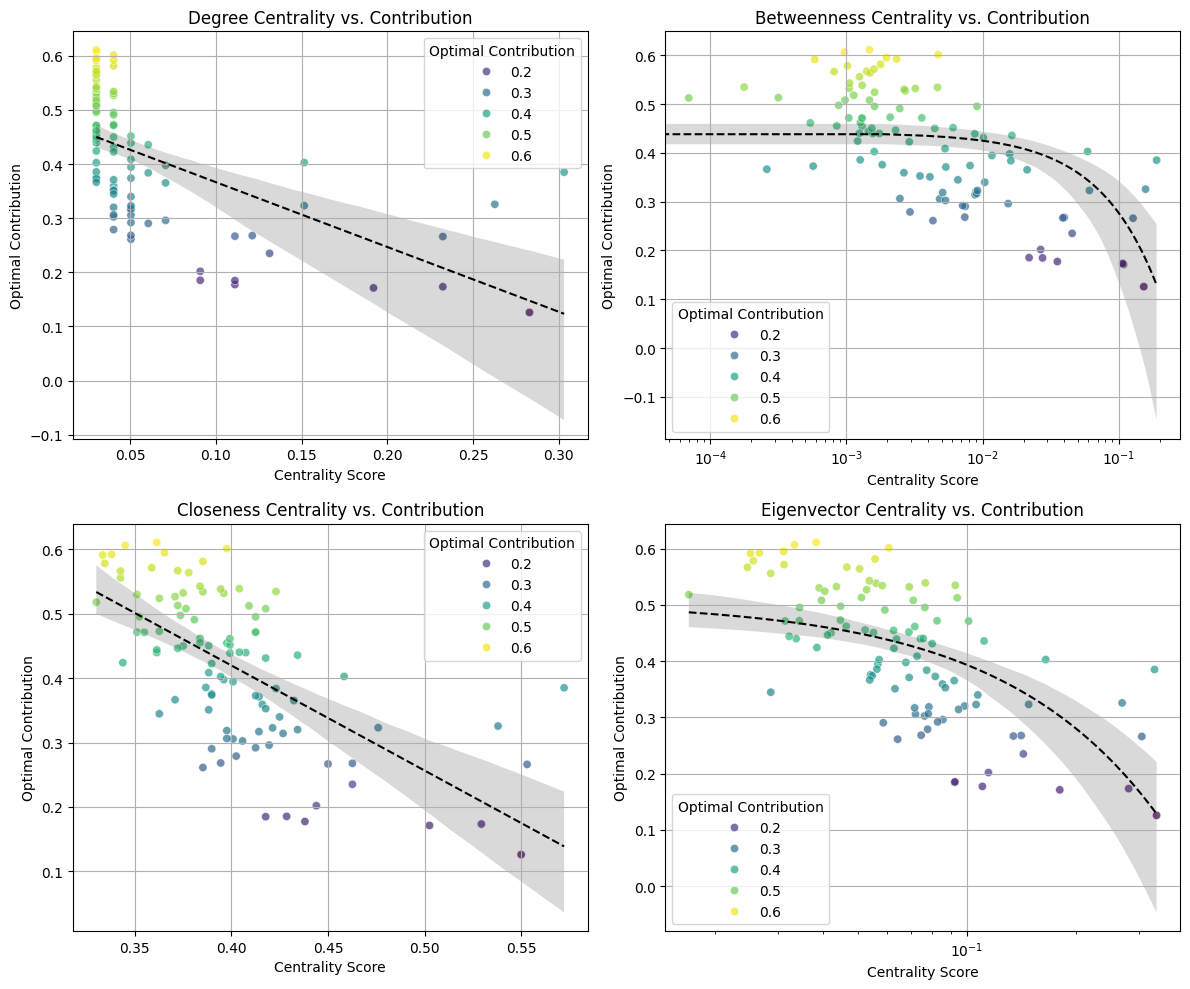

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(network)
betweenness_centrality = nx.betweenness_centrality(network)
closeness_centrality = nx.closeness_centrality(network)
eigenvector_centrality = nx.eigenvector_centrality(network, max_iter=1000)

# Store results in a DataFrame
results_df = pd.DataFrame({
    "Player": np.arange(n),
    "Degree": degrees,  # Ensure degree values are included
    "Degree Centrality": [degree_centrality[i] for i in range(n)],
    "Betweenness Centrality": [betweenness_centrality[i] for i in range(n)],
    "Closeness Centrality": [closeness_centrality[i] for i in range(n)],
    "Eigenvector Centrality": [eigenvector_centrality[i] for i in range(n)],
    "Optimal Contribution": c_fp
})

# Set up a 2x2 grid for centrality plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define centrality types and axes
centrality_types = [
    ("Degree Centrality", axes[0, 0]),
    ("Betweenness Centrality", axes[0, 1]),
    ("Closeness Centrality", axes[1, 0]),
    ("Eigenvector Centrality", axes[1, 1])
]

# Create scatter plots for each centrality measure
for centrality, ax in centrality_types:
    # Scatter plot with color based on contribution levels
    sc = sns.scatterplot(
        data=results_df, x=centrality, y="Optimal Contribution",
        hue="Optimal Contribution", palette="viridis", alpha=0.7, ax=ax
    )

    # Regression trend line
    sns.regplot(
        data=results_df, x=centrality, y="Optimal Contribution",
        scatter=False, color="black", line_kws={"linewidth": 1.5, "linestyle": "dashed"}, ax=ax
    )

    # Use log scale for betweenness and eigenvector centrality
    if centrality in ["Betweenness Centrality", "Eigenvector Centrality"]:
        ax.set_xscale("log")

    ax.set_title(f"{centrality} vs. Contribution")
    ax.set_xlabel("Centrality Score")
    ax.set_ylabel("Optimal Contribution")
    ax.grid(True)

plt.tight_layout()
plt.savefig("centrality_vs_contribution_AB.png", dpi=300, bbox_inches="tight")
plt.show()

# Download file (if running in Colab)
files.download("centrality_vs_contribution_AB.png")


<ipython-input-10-6709316dfab9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Optimal Contribution", data=comparison_df, palette=["red", "blue"], width=0.6)


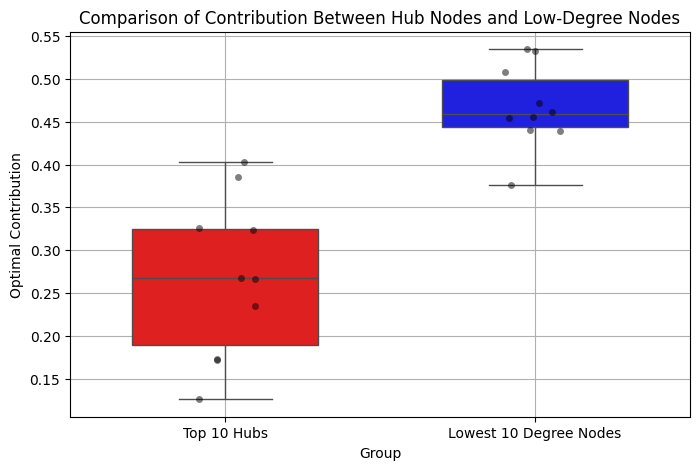

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Select the top 10 highest-degree nodes (hubs)
top_hubs = results_df.nlargest(10, "Degree")

# Select the bottom 10 lowest-degree nodes
low_degree_nodes = results_df.nsmallest(10, "Degree")

# Create a new DataFrame for visualization
comparison_df = pd.concat([
    top_hubs.assign(Group="Top 10 Hubs"),
    low_degree_nodes.assign(Group="Lowest 10 Degree Nodes")
])

# Plot boxplot with scatter points
plt.figure(figsize=(8, 5))

# Boxplot for comparison
sns.boxplot(x="Group", y="Optimal Contribution", data=comparison_df, palette=["red", "blue"], width=0.6)

# Add individual data points for better visualization
sns.stripplot(x="Group", y="Optimal Contribution", data=comparison_df, color="black", alpha=0.5, jitter=True)

# Set labels and title
plt.ylabel("Optimal Contribution")
plt.title("Comparison of Contribution Between Hub Nodes and Low-Degree Nodes")

# Display the grid for better visualization
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.savefig("hub_vs_lowdegree_contributions_AB.png", dpi=300, bbox_inches="tight")
plt.show()

# Download file (if running in Colab)
files.download("hub_vs_lowdegree_contributions_AB.png")